### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import accuracy_score

### Part I - Dealing with missing data

In [4]:
# Importing employees dataset
df = pd.read_csv('employees.csv')
df.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,198,Donald,OConnell,DOCONNEL,650.507.9833,21-Jun-07,SH_CLERK,2600,-,124,50.0
1,199,Douglas,Grant,DGRANT,650.507.9844,13-Jan-08,SH_CLERK,2600,-,124,50.0
2,200,Jennifer,Whalen,JWHALEN,515.123.4444,17-Sep-03,AD_ASST,4400,-,101,10.0
3,201,Michael,Hartstein,MHARTSTE,515.123.5555,17-Feb-04,MK_MAN,13000,-,100,20.0
4,202,Pat,Fay,PFAY,603.123.6666,17-Aug-05,MK_REP,6000,-,201,NaN


In [5]:
# Count the numbers of NaN values
df.isnull().sum()

EMPLOYEE_ID       0
FIRST_NAME        0
LAST_NAME         0
EMAIL             0
PHONE_NUMBER      0
HIRE_DATE         0
JOB_ID            0
SALARY            0
COMMISSION_PCT    0
MANAGER_ID        0
DEPARTMENT_ID     9
dtype: int64

In [6]:
# Remove rows that contain NaN values
df.dropna(axis=0)

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL,PHONE_NUMBER,HIRE_DATE,JOB_ID,SALARY,COMMISSION_PCT,MANAGER_ID,DEPARTMENT_ID
0,198,Donald,OConnell,DOCONNEL,650.507.9833,21-Jun-07,SH_CLERK,2600,-,124,50.0
1,199,Douglas,Grant,DGRANT,650.507.9844,13-Jan-08,SH_CLERK,2600,-,124,50.0
2,200,Jennifer,Whalen,JWHALEN,515.123.4444,17-Sep-03,AD_ASST,4400,-,101,10.0
3,201,Michael,Hartstein,MHARTSTE,515.123.5555,17-Feb-04,MK_MAN,13000,-,100,20.0
5,203,Susan,Mavris,SMAVRIS,515.123.7777,07-Jun-02,HR_REP,6500,-,101,40.0
6,204,Hermann,Baer,HBAER,515.123.8888,07-Jun-02,PR_REP,10000,-,101,70.0
7,205,Shelley,Higgins,SHIGGINS,515.123.8080,07-Jun-02,AC_MGR,12008,-,101,110.0
8,206,William,Gietz,WGIETZ,515.123.8181,07-Jun-02,AC_ACCOUNT,8300,-,205,110.0
9,100,Steven,King,SKING,515.123.4567,17-Jun-03,AD_PRES,24000,-,-,90.0
10,101,Neena,Kochhar,NKOCHHAR,515.123.4568,21-Sep-05,AD_VP,17000,-,100,90.0


### Part II - Mapping ordinal features

In [7]:
# Importing diabetes dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Name,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Laura Bennett,6,148,72,35,0,33.6,0.627,50,Yes
1,Wesley Green,1,85,66,29,0,26.6,0.351,31,NO
2,Tina Johnson DDS,8,183,64,0,0,23.3,0.672,32,Yes
3,Troy Fisher,1,89,66,23,94,28.1,0.167,21,NO
4,Nathan Brown,0,137,40,35,168,43.1,2.288,33,Yes


In [8]:
# Map the outcome column to binary values
outcome_mapping = {'Yes': 0, 'NO': 1}

df['Outcome'] = df['Outcome'].map(outcome_mapping)
df.head()

,Name,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Laura Bennett,6,148,72,35,0,33.6,0.627,50,0
1,Wesley Green,1,85,66,29,0,26.6,0.351,31,1
2,Tina Johnson DDS,8,183,64,0,0,23.3,0.672,32,0
3,Troy Fisher,1,89,66,23,94,28.1,0.167,21,1
4,Nathan Brown,0,137,40,35,168,43.1,2.288,33,0


### Part III -  Identifying and Removing Outliers

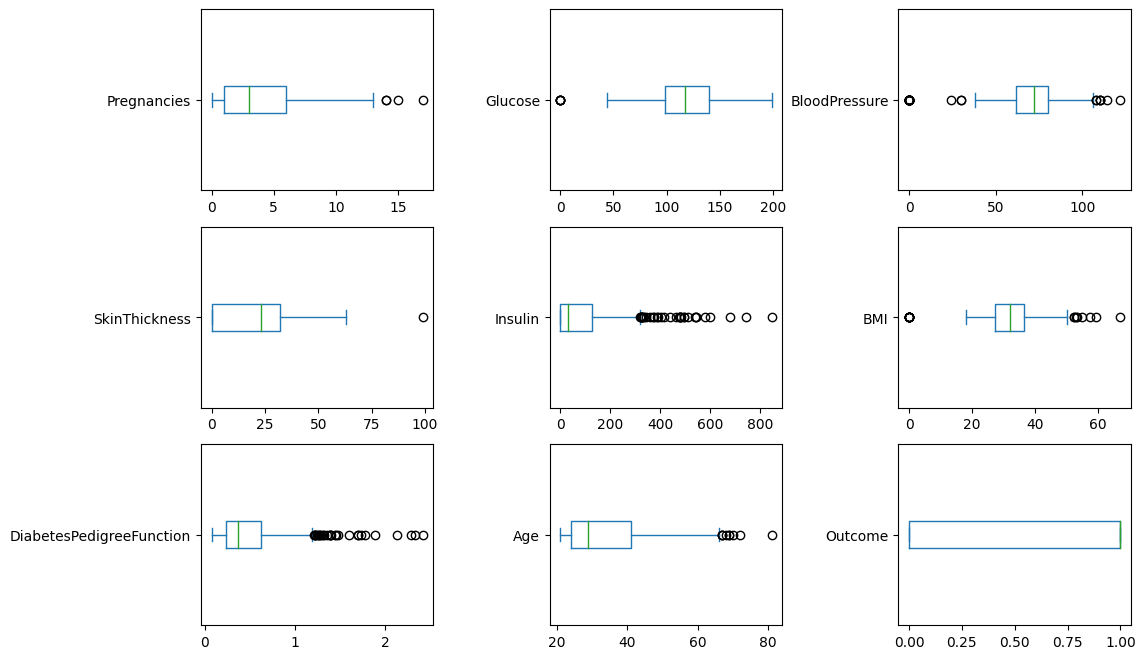

In [9]:
# Detect the outliers in each column using horizontal boxplots
columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
           'BMI','DiabetesPedigreeFunction','Age','Outcome']

df[columns].plot(kind='box', subplots=True, layout=(3,3), sharex=False, 
                 sharey=False, figsize =(12,8), vert=False)
plt.subplots_adjust(wspace=0.5)
plt.show()

Column name:  Pregnancies
Original dataset:  (768, 10)
Cleaned dataset:  (764, 10)


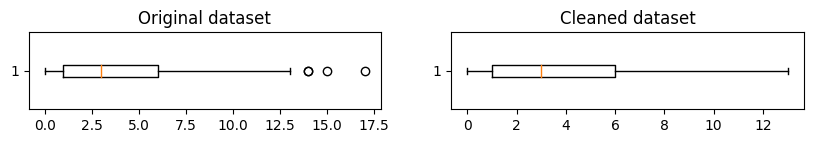

Column name:  Glucose
Original dataset:  (768, 10)
Cleaned dataset:  (759, 10)


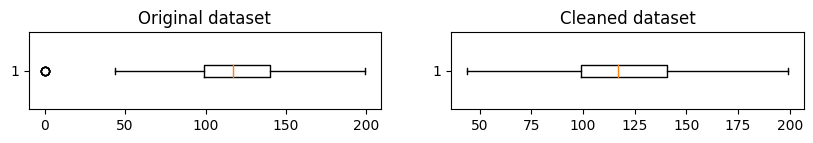

Column name:  BloodPressure
Original dataset:  (768, 10)
Cleaned dataset:  (714, 10)


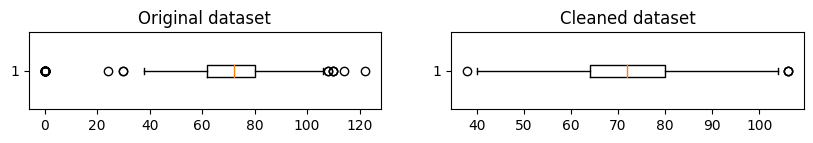

Column name:  SkinThickness
Original dataset:  (768, 10)
Cleaned dataset:  (713, 10)


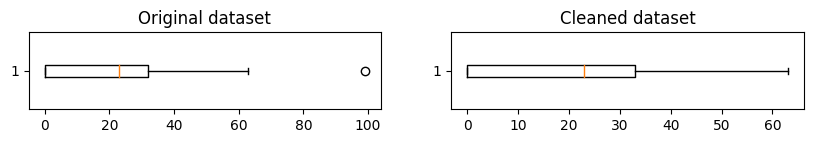

Column name:  Insulin
Original dataset:  (768, 10)
Cleaned dataset:  (679, 10)


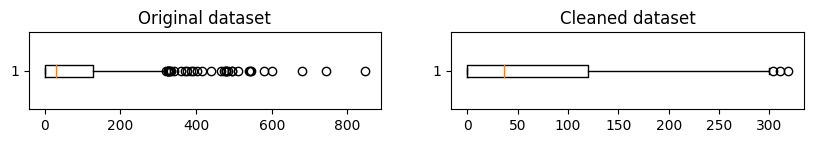

Column name:  BMI
Original dataset:  (768, 10)
Cleaned dataset:  (671, 10)


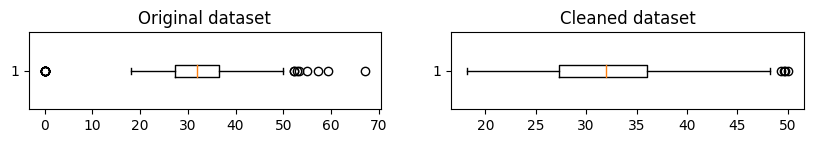

Column name:  DiabetesPedigreeFunction
Original dataset:  (768, 10)
Cleaned dataset:  (646, 10)


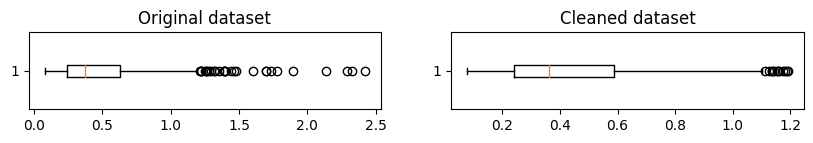

Column name:  Age
Original dataset:  (768, 10)
Cleaned dataset:  (639, 10)


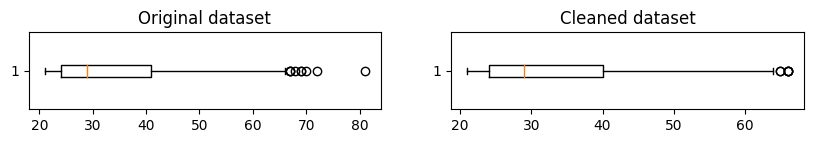

Column name:  Outcome
Original dataset:  (768, 10)
Cleaned dataset:  (639, 10)


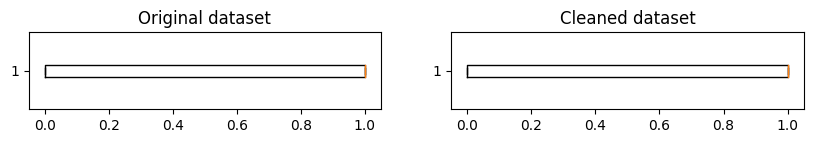

In [10]:
# Drop the outliers
cleaned_df = df.copy()
for i in columns:
    # Calculate the upper and lower limits
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    
    lower_limit = q1 - 1.5 * iqr
    upper_limit = q3 + 1.5 * iqr
        
    # Removing the outliers
    cleaned_df = cleaned_df[(cleaned_df[i] < upper_limit) & (cleaned_df[i] > lower_limit)]

    # Comparing dimensions of original and cleaned dataset
    print("Column name: ", i)
    print("Original dataset: ", df.shape)
    print("Cleaned dataset: ", cleaned_df.shape)

    # Comparing boxplots of original and cleaned dataset
    plt.figure(figsize=(10, 1))
    plt.subplot(1, 2, 1)
    plt.title('Original dataset')
    plt.boxplot(df[i], vert=False)
    plt.subplot(1, 2, 2)
    plt.title('Cleaned dataset')
    plt.boxplot(cleaned_df[i], vert=False)
    plt.show()

### Part IV -  Feature Importance Assessment and Application of SBS and Logistic Regression 

In [11]:
# Utilize Random Forest for feature importance
X = cleaned_df.drop(['Outcome', 'Name'], axis=1)
y = cleaned_df['Outcome']

# Train Random Forest model
rfc = RandomForestClassifier(random_state=1)
rfc.fit(X, y)

RandomForestClassifier(random_state=1)

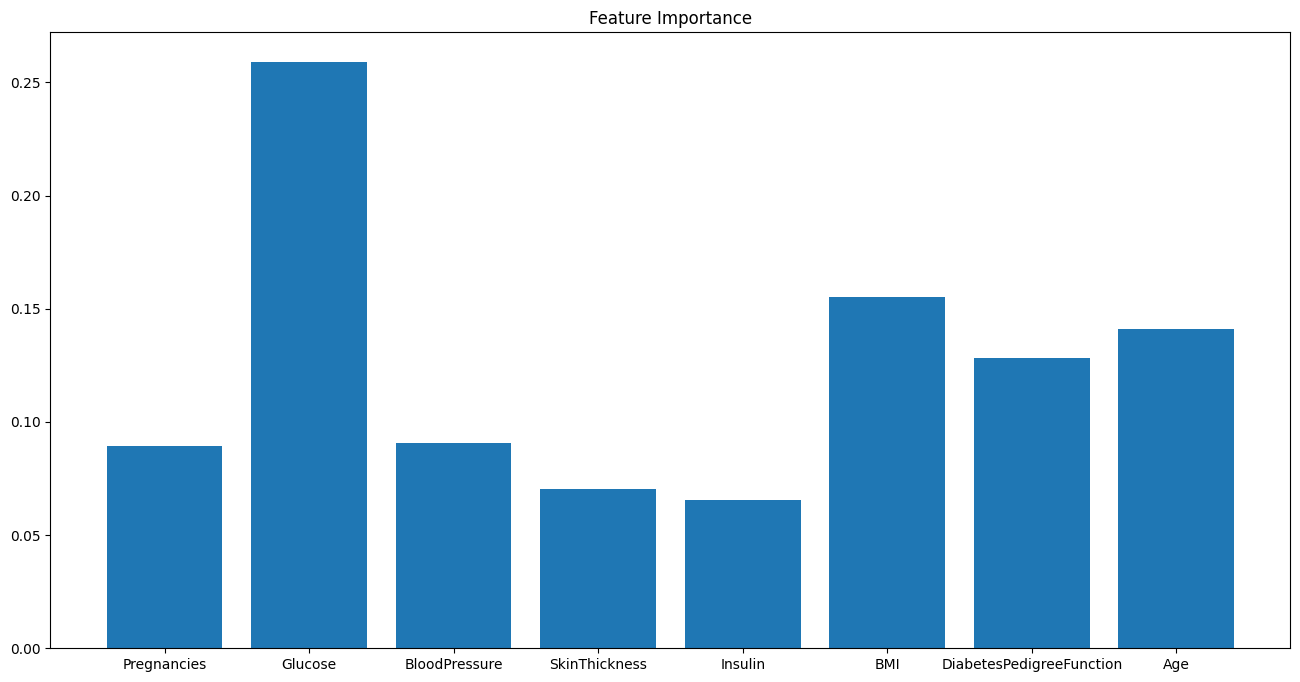

In [12]:
# Get feature importances
feature_importances = rfc.feature_importances_
feature_names = X.columns

# Create a bar plot for feature importance
plt.figure(figsize=(16, 8))
plt.bar(feature_names, feature_importances)
plt.title('Feature Importance')
plt.show()

In [13]:
# Spliting the dataset to training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

print("Labels count in y_train: ", np.bincount(y_train))
print("Labels count in y_test: ", np.bincount(y_test))

Labels count in y_train:  [140 307]
Labels count in y_test:  [ 60 132]


In [14]:
# Feature scaling
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [15]:
# Training the Logistic Regression model
lr = LogisticRegression(penalty='l1', solver='liblinear')
lr.fit(X_train_std, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [16]:
# Accuracy of the Logistic Regression model
print("Training Accuracy: ", lr.score(X_train_std, y_train))
print("Test Accuracy: ", lr.score(X_test_std, y_test))

Training Accuracy:  0.8076062639821029
Test Accuracy:  0.7552083333333334


In [17]:
# Implement Sequential Backward Selection (SBS)
sbs = SequentialFeatureSelector(lr, n_features_to_select=5, direction='backward')
sbs.fit(X_train_std, y_train)

SequentialFeatureSelector(direction='backward',
                          estimator=LogisticRegression(penalty='l1',
                                                       solver='liblinear'),
                          n_features_to_select=5)

In [18]:
# Get selected features and corresponding accuracies
selected_features = [feature_names[i] for i in sbs.get_support(indices=True)]

# Initialize an empty list to store accuracies
accuracies = []

# Iterate over the selected features and calculate accuracies
for i in range(1, len(selected_features) + 1):
    # Get the subset of selected features
    selected_indices = sbs.get_support(indices=True)[:i]
    selected_subset = X_test_std[:, selected_indices]

    # Fit a new Logistic Regression model on the selected features
    lr_copy = LogisticRegression(penalty='l1', solver='liblinear')
    lr_copy.fit(X_train_std[:, selected_indices], y_train)

    # Predict using the new Logistic Regression model
    y_pred = lr_copy.predict(selected_subset)

    # Calculate accuracy and append to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

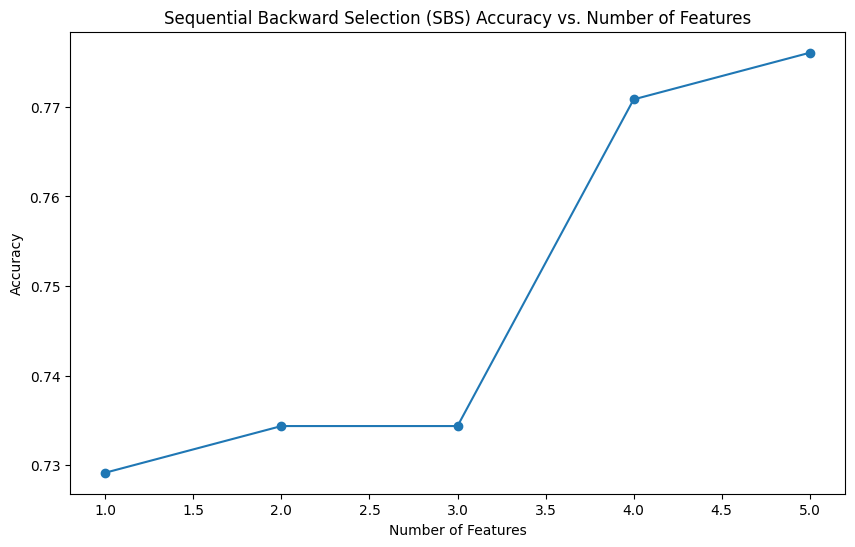

In [19]:
# Plot Accuracy vs. Number of Features
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(selected_features) + 1), accuracies, marker='o')
plt.xlabel('Number of Features')
plt.ylabel('Accuracy')
plt.title('Sequential Backward Selection (SBS) Accuracy vs. Number of Features')
plt.show()

In [20]:
accuracies

[0.7291666666666666,
 0.734375,
 0.734375,
 0.7708333333333334,
 0.7760416666666666]